# Modules:-
#    1. Feature Selection-RFE,PCA
#    2. QNN - OPTIMIZER(COBYLA,L_BFGS_B),K-CROSS FOLD VALIDATION
#    3. QSVC
#    4. BAGGING-SVC
#    5. CLASSICAL MODELS
#    6. MLP-WITH AND WITHOUT HIDDEN LAYERS
#    7. VQC-PQC(ANSTANZ-REALAMPLITUDES,EFFICIENTSUV2)
#    8. COMPARISON OF ALL THE MODELS
#DATASET USED:-
#health_indicators_BRFSS2015

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost  as  xgb #from xgboost import XGBClassifier
from numpy import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from collections import Counter

In [ ]:
from qiskit_algorithms.utils import algorithm_globals
#using Estimator
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit_machine_learning.neural_networks import EstimatorQNN
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,log_loss,classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

#qiskit
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, TwoLocal, RealAmplitudes
from IPython.display import clear_output
import matplotlib as plt
from qiskit_machine_learning.algorithms import QSVC, NeuralNetworkClassifier,VQC
from qiskit_algorithms.optimizers import SPSA, L_BFGS_B, COBYLA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import clear_output
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import Sampler
import time

In [ ]:
data=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
data=data.iloc[0:500,0:20]
X = data.drop(['HeartDiseaseorAttack'] ,axis="columns")
y = data['HeartDiseaseorAttack']

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X, y)

# Recursive Feature Elimination

RFE is an example of backward feature elimination in which we essentially first fit our model using all the features in a given set, then progressively one by one we remove the least significant features, each time re-fitting, until we are left with the desired number of features, which is set by the parameter n_features_to_select.



In [ ]:
from operator import itemgetter
features = X.columns.to_list()
for x, y in (sorted(zip(selector.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 HighBP
1 HighChol
1 Smoker
1 Stroke
1 Diabetes
1 AnyHealthcare
2 DiffWalk
3 HvyAlcoholConsump
4 CholCheck
5 GenHlth
6 Sex
7 Fruits
8 BMI
9 Age
10 Veggies
11 PhysActivity
12 Education
13 MentHlth
14 Income
15 PhysHlth
16 NoDocbcCost


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
data=data.iloc[0:5000]
X = data.drop(['HeartDiseaseorAttack'] ,axis="columns")
y = data['HeartDiseaseorAttack']

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X, y)

In [ ]:
from operator import itemgetter
features = X.columns.to_list()
for x, y in (sorted(zip(selector.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 HighBP
1 Smoker
1 Veggies
1 HvyAlcoholConsump
1 AnyHealthcare
1 NoDocbcCost
2 MentHlth
3 Stroke
4 CholCheck
5 Sex
6 HighChol
7 Fruits
8 GenHlth
9 Diabetes
10 DiffWalk
11 PhysActivity
12 Age
13 Income
14 Education
15 PhysHlth
16 BMI


In [ ]:
from qiskit.primitives import Sampler
algorithm_globals.random_seed = 42
quantum_instance = Sampler()

In [ ]:
df2=data.iloc[0:200]
X = df2[['HighBP','HighChol','Smoker']]
y = df2['HeartDiseaseorAttack']
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)
std_scaler = StandardScaler().fit(X)
X = std_scaler.transform(X)

pca = PCA(n_components=3).fit(X)
X = pca.transform(X)

minmax_scaler = MinMaxScaler((0, 1)).fit(X)
X = minmax_scaler.transform(X)

# for cross validation
X_df = pd.DataFrame(X, columns = ['A','B','C'])

num_inputs = 3

In [ ]:
# Classification with a CircuitQNN
# construct feature map
feature_map = ZFeatureMap(num_inputs)

# construct ansatz
ansatz = RealAmplitudes(num_inputs, reps=2)

# construct quantum circuit
qc = QuantumCircuit(num_inputs)
qc.append(feature_map, range(num_inputs))
qc.append(ansatz, range(num_inputs))
qc.decompose()

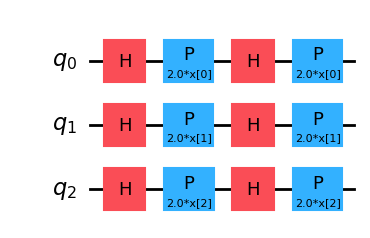

In [ ]:
feature_map.decompose().draw("mpl")

In [ ]:
# parity maps bitstrings to 0 or 1
def parity(x):
    return "{:b}".format(x).count("1") % 2


output_shape = 2  # corresponds to the number of classes, possible outcomes of the (parity) mapping

In [ ]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
from qiskit_machine_learning.neural_networks import SamplerQNN

sampler_qnn = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=2,
    sampler=quantum_instance,
)

The target goal of Limited-memory Broyden-Fletcher-Goldfarb-Shanno Bound (L-BFGS-B) is to minimize the value of a differentiable scalar function This optimizer is a quasi-Newton method, meaning that, in contrast to Newtons’s method, it does not require Hessian (the matrix of second derivatives) when attempting to compute minimum value.

BFGS using a limited amount of computer memory. L-BFGS starts with an initial estimate of the optimal value, and proceeds iteratively to refine that estimate with a sequence of better estimates.

The derivatives of are used to identify the direction of steepest descent, and also to form an estimate of the Hessian matrix (second derivative) of L-BFGS-B extends L-BFGS to handle simple, per-variable bound constraints.

In [ ]:
# construct classifier
circuit_classifier = NeuralNetworkClassifier(
            neural_network=sampler_qnn, optimizer= L_BFGS_B(), loss='absolute_error', callback=callback_graph
)

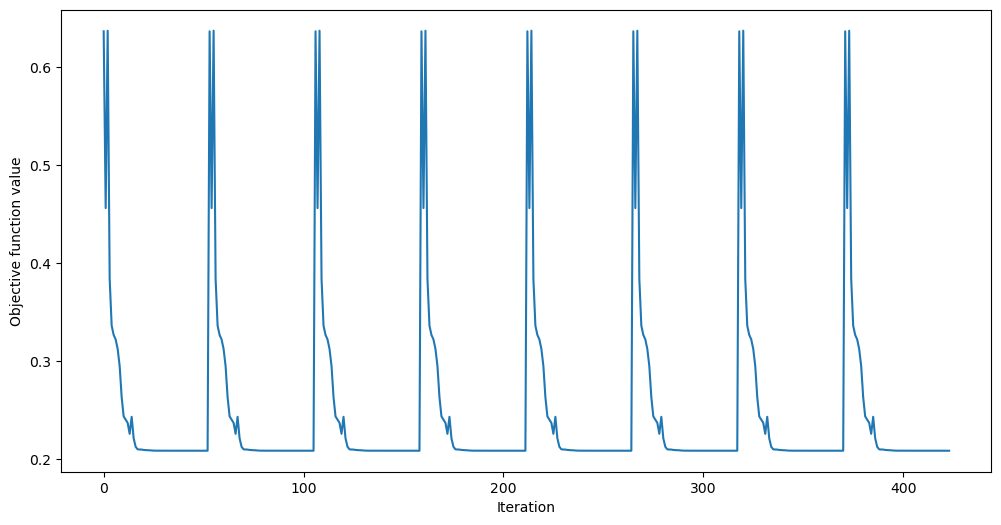

Final prediction score: [0.84000000]


In [ ]:
# cross validation
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

kf = KFold(n_splits = 8, shuffle = True, random_state= 1)
scores = []
for i in range(8):
    result = next(kf.split(X_df), None)
    x_train = X_df.iloc[result[0]]
    x_test = X_df.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    circuit_classifier.fit(x_train,y_train)
    y_pred = circuit_classifier.predict(x_test)

plt.rcParams["figure.figsize"] = (6, 4)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

In [ ]:
m_n=[]
m_n.append(accuracy_score(y_test, y_pred))
acc=[]
acc.append('QNN')

In [ ]:
m_n.append(.84)
acc.append('QNN')

In [ ]:
expected_y  = y_test
predicted_y = circuit_classifier.predict(x_test)

# print classification report and confusion matrix for the classifier
print("Classification report: \n", metrics.classification_report(expected_y, predicted_y))
print("Confusion matrix: \n", metrics.confusion_matrix(expected_y, predicted_y))

Classification report: 
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        21
         1.0       0.00      0.00      0.00         4

    accuracy                           0.84        25
   macro avg       0.42      0.50      0.46        25
weighted avg       0.71      0.84      0.77        25

Confusion matrix: 
 [[21  0]
 [ 4  0]]


C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


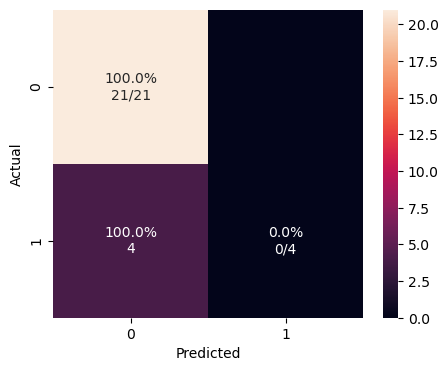

In [ ]:
#confusion matrix of QNN
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(5,4)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)

cm_analysis(y_test, predicted_y, labels=[0,1], ymap=None, figsize=(5,4))

# Making variations in the same code :-using cobyla optimizer and without K-cross val and not using call_back graph

In [ ]:
df2=data.iloc[0:200]
X = df2[['HighBP','HighChol','Smoker']]
y = df2['HeartDiseaseorAttack']
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)
std_scaler = StandardScaler().fit(X)
X = std_scaler.transform(X)


minmax_scaler = MinMaxScaler((0, 1)).fit(X)
X = minmax_scaler.transform(X)

# for cross validation
X_df = pd.DataFrame(X, columns = ['A','B','C'])

num_inputs = 3

In [ ]:
# construct classifier
circuit_classifier = NeuralNetworkClassifier(
            neural_network=sampler_qnn, optimizer= COBYLA(), loss='absolute_error'
)

In [ ]:
x_train,x_test, y_train, y_test=train_test_split(X_df,y,test_size=0.30)
circuit_classifier.fit(x_train,y_train)
y_pred = circuit_classifier.predict(x_test)

In [ ]:
expected_y  = y_test
predicted_y = circuit_classifier.predict(x_test)

# print classification report and confusion matrix for the classifier
print("Classification report: \n", metrics.classification_report(expected_y, predicted_y))
print("Confusion matrix: \n", metrics.confusion_matrix(expected_y, predicted_y))

Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.75      0.82        56
         1.0       0.00      0.00      0.00         4

    accuracy                           0.70        60
   macro avg       0.46      0.38      0.41        60
weighted avg       0.85      0.70      0.77        60

Confusion matrix: 
 [[42 14]
 [ 4  0]]


In [ ]:
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.70000000]


In [ ]:
m_n.append(.70)
acc.append('QNN-COBYLA')

# Using different loss function

# QSVC

In [ ]:
data=data.iloc[0:200]
X = data[['HighBP','HighChol','Smoker']]
y = data['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

samples = np.append(X_train, X_test, axis=0)
minmax_scaler = MinMaxScaler((0, 1)).fit(samples)
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
# number of qubits is equal to the number of features
num_qubits = 3
# regularization parameter
C = 10

In [ ]:
adhoc_dimension=4
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=4, entanglement="linear")
#classical data is encoded into qubit angles
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

In [ ]:

qsvm_model = QSVC(quantum_kernel=adhoc_kernel)
qsvm_model.fit(X_train, y_train.values.ravel())
qsvm_pred = qsvm_model.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, qsvm_pred))
print("Classification Report")
print(classification_report(y_test, qsvm_pred))
qsvc_score = qsvm_model.score(X_test, y_test)
print(f"QSVC classification test score: {qsvc_score}")

Confusion Matrix
[[54  0]
 [ 6  0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        54
         1.0       0.00      0.00      0.00         6

    accuracy                           0.90        60
   macro avg       0.45      0.50      0.47        60
weighted avg       0.81      0.90      0.85        60



C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


QSVC classification test score: 0.9


In [ ]:
m_n.append(qsvc_score)

acc.append('QSVC')

# Bagging SVC

In [ ]:
# Pipeline Estimator
pipeline = make_pipeline(MinMaxScaler(), qsvm_model)

# Instantiate the bagging classifier
bgclassifier = BaggingClassifier(estimator=pipeline, n_estimators=10,
                                 random_state=1, n_jobs=-1)

# Fit the bagging classifier
bgclassifier.fit(X_train, y_train.ravel())

# Model scores on test and training data
print('Model test Score: %.4f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.4f' %bgclassifier.score(X_train, y_train))


Model test Score: 0.9000,  Model training Score: 0.8500


In [ ]:
y_pred =bgclassifier.predict(X_test)
m_n.append(accuracy_score(y_test, y_pred))
acc.append('QSVC')

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))
qsvc_score = qsvm_model.score(X_test, y_test)
print(f"QSVC classification test score: {qsvc_score}")

Confusion Matrix
[[54  0]
 [ 6  0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        54
         1.0       0.00      0.00      0.00         6

    accuracy                           0.90        60
   macro avg       0.45      0.50      0.47        60
weighted avg       0.81      0.90      0.85        60



C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


QSVC classification test score: 0.9


# Classical models

In [ ]:
data.shape

(200, 22)

In [ ]:
data=data.iloc[0:200]
X = data[['HighBP','HighChol','Smoker']]
y = data['HeartDiseaseorAttack']
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
print("shapes: ")
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

shapes: 
X_train  (160, 3)
X_test  (40, 3)
y_train  (160,)
y_test  (40,)


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(f"Decision Tree: Mean Accuracy = {scores.mean():.4f} (Std. Dev. = {scores.std():.4f})")
accuracy=accuracy_score(y_test,tree.predict(X_test));
print(accuracy)

Decision Tree: Mean Accuracy = 0.8688 (Std. Dev. = 0.0125)
0.85


In [ ]:
model=BaggingClassifier(estimator=tree,n_estimators=100)
model.fit(X_train,y_train)
accuracy=accuracy_score(y_test,model.predict(X_test));
print(accuracy)

0.85


In [ ]:
rf=RandomForestClassifier(max_depth=2,random_state=0)
model_rf=BaggingClassifier(estimator=rf,n_estimators=100)
model_rf.fit(X_train,y_train)
accuracy_rf=accuracy_score(y_test,model_rf.predict(X_test));
print(accuracy_rf)

0.85


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
model_knn=BaggingClassifier(estimator=knn,n_estimators=100)
model_knn.fit(X_train,y_train)
accuracy_knn=accuracy_score(y_test,model_knn.predict(X_test));
print(accuracy_knn)

0.85


In [ ]:
model_gb=GradientBoostingClassifier(learning_rate=.1).fit(X_train,y_train)
accuracy_gb=accuracy_score(y_test,model_gb.predict(X_test));
print(accuracy_gb)

0.85


In [ ]:
model_ab=AdaBoostClassifier(n_estimators=100,random_state=0).fit(X_train,y_train)
accuracy_ab=accuracy_score(y_test,model_ab.predict(X_test));
print(accuracy_ab)

0.85


C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
model_xgb=xgb.XGBClassifier(n_estimators=100,objective='binary:logistic',tree_method='hist',max_depth=3,enable_categorical=True).fit(X_train,y_train)
accuracy_xgb=accuracy_score(y_test,model_xgb.predict(X_test));
print(accuracy_xgb)

0.85


In [ ]:
voting=VotingClassifier(estimators=[
    ('dt',DecisionTreeClassifier()),('rf',RandomForestClassifier(max_depth=2,random_state=0)),('knn',KNeighborsClassifier(n_neighbors=3))],voting='hard')

In [ ]:
voting.fit(X_train,y_train)
accuracy_voting=accuracy_score(y_test,voting.predict(X_test));
print(accuracy_voting)

0.85


In [ ]:
# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
 # fit and evaluate the models
 scores = list()
 for name, model in models:
 # fit the model
  model.fit(X_train, y_train)
 # evaluate the model
  yhat = model.predict(X_val)
  acc = accuracy_score(y_val, yhat)
 # store the performance
  scores.append(acc)
 # report model performance
 return scores

In [ ]:
def get_models():
 models = list()
 models.append(('dt', DecisionTreeClassifier()))
 models.append(('rf', RandomForestClassifier(max_depth=2,random_state=0)))
 models.append(('knn',KNeighborsClassifier(n_neighbors=3)))
 models.append(('lg',LogisticRegression()))
 return models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print(scores)

[0.85, 0.85, 0.85, 0.85]


In [ ]:
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)
# make predictions on test set
yhat = ensemble.predict(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print('Weighted Avg Accuracy: %.3f' % (score*100))

0.85
Weighted Avg Accuracy: 85.000


In [ ]:
def fit_ensemble(models, X_train, X_val, y_train, y_val):
 # fit all models on the training set and predict on hold out set
 meta_X = list()
 for name, model in models:
 # fit in training set
  model.fit(X_train, y_train)
 # predict on hold out set
  yhat = model.predict(X_val)
 # reshape predictions into a matrix with one column
  yhat = yhat.reshape(len(yhat), 1)
 # store predictions as input for blending
  meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
 meta_X = hstack(meta_X)
 # define blending model
 blender = MLPClassifier(random_state=1, max_iter=1000)
 # fit on predictions from base models
 blender.fit(meta_X, y_val)
 return blender

In [ ]:
## make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
 # make predictions with base models
 meta_X = list()
 for name, model in models:
 # predict with base model
  yhat = model.predict(X_test)
 # reshape predictions into a matrix with one column
  yhat = yhat.reshape(len(yhat), 1)
 # store prediction
  meta_X.append(yhat)
 # create 2d array from predictions, each set is an input feature
 meta_X = hstack(meta_X)
 # predict
 return blender.predict(meta_X)

In [ ]:
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_test, y_train, y_test)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print(score)
print('Blending Accuracy: %.3f' % (score*100))

0.85
Blending Accuracy: 85.000


In [ ]:
models = {
    "Decision tree":tree,
    "Bagging-DT":model,
    "Baggig-KNN":knn ,
    "Bagging-RF":rf,
    "Boosting-gb":model_gb,
    "Boosting-ada":model_ab,
    "Boosting-xgb":model_xgb,
    "Stacking-voting":voting,
    "Stacking-weighted_avg":ensemble,
    "Stacking-blendind":blender
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Print accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy}")

C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Decision tree Accuracy: 0.85
Bagging-DT Accuracy: 0.85
Baggig-KNN Accuracy: 0.85
Bagging-RF Accuracy: 0.85
Boosting-gb Accuracy: 0.85
Boosting-ada Accuracy: 0.85
Boosting-xgb Accuracy: 0.85
Stacking-voting Accuracy: 0.85
Stacking-weighted_avg Accuracy: 0.85
Stacking-blendind Accuracy: 0.85


In [ ]:
!pip install xgboost

# MLP WITHOUT HIDDEN LAYER AND ACTIVATION FUNCTION

In [ ]:
model = MLPClassifier(max_iter=100,  random_state=5)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.85000000]


C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

print(f"MLP classification test score: {accuracy_score(y_test, y_pred)}")

Confusion Matrix
[[34  0]
 [ 6  0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        34
         1.0       0.00      0.00      0.00         6

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40

MLP classification test score: 0.85


C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# MLP WITH HIDDEN LAYER AND RELU ACTIVATION FUNCTION AND ADAM OPTIMIZER

In [ ]:
data=data.iloc[0:200]
X = data[['HighBP','HighChol','Smoker']]
y = data['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

samples = np.append(X_train, X_test, axis=0)
minmax_scaler = MinMaxScaler((0, 1)).fit(samples)
X_train = minmax_scaler.transform(X_train)
X_test = minmax_scaler.transform(X_test)

C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=200,activation = 'relu',solver='adam',random_state=1)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))
#m_n.append(accuracy_score(y_test, y_pred))
#acc.append('MLP')

Final prediction score: [0.90000000]


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

print(f"MLP classification test score: {accuracy_score(y_test, y_pred)}")

Confusion Matrix
[[54  0]
 [ 6  0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        54
         1.0       0.00      0.00      0.00         6

    accuracy                           0.90        60
   macro avg       0.45      0.50      0.47        60
weighted avg       0.81      0.90      0.85        60

MLP classification test score: 0.9


C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# VQC

VQC stands for “variational quantum classifier.” It takes a feature map and an ansatz and constructs a quantum neural network automatically

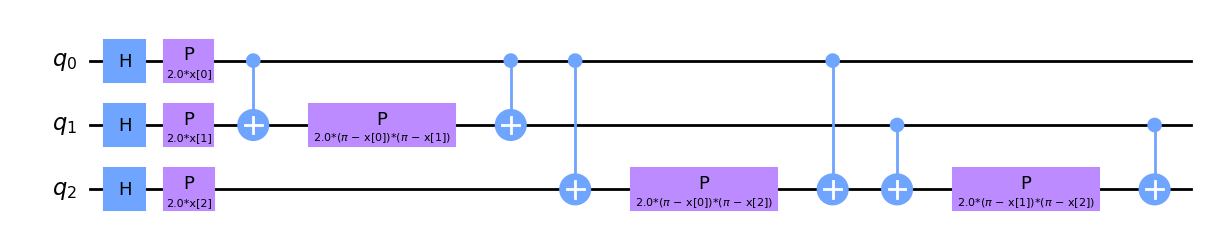

In [ ]:
data=data.iloc[0:200]
X = data[['HighBP','HighChol','Smoker']]
y = data['HeartDiseaseorAttack']
num_features = X.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y.to_numpy().reshape(-1,1), train_size=0.8, random_state=algorithm_globals.random_seed
)

The real-amplitudes 2-local circuit.The RealAmplitudes circuit is a heuristic trial wave function . The circuit consists of alternating layers of Y rotations and CX entanglements. The entanglement pattern can be user-defined or selected from a predefined set. It is called RealAmplitudes since the prepared quantum states will only have real amplitudes, the complex part is always 0.

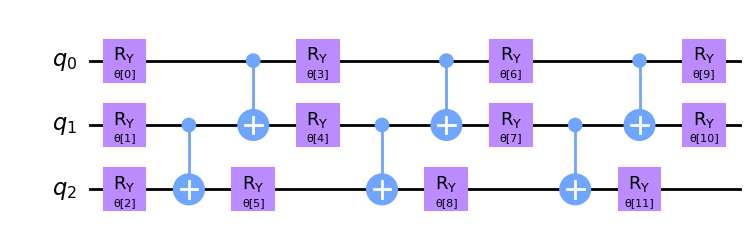

In [ ]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [ ]:
optimizer = COBYLA(maxiter=100)# to train the process

In [ ]:
sampler = Sampler()

In [ ]:

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

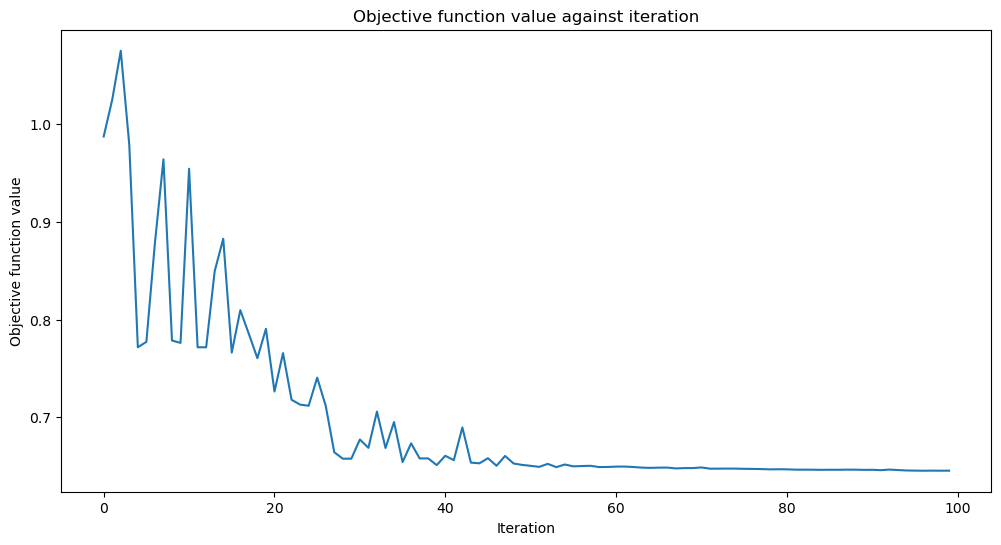

Training time: 63 seconds


In [ ]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features,train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.87
Quantum VQC on the test dataset:     0.85


In [ ]:
# classification report of VQC
expected_y  = y_test
predicted_y = vqc.predict(X_test)

# print classification report and confusion matrix for the classifier
print("Classification report: \n", metrics.classification_report(expected_y, predicted_y))
print("Confusion matrix: \n", metrics.confusion_matrix(expected_y, predicted_y))
acu=accuracy_score(expected_y, predicted_y)
m_n.append(acu)

acc.append('VQC')

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        54
         1.0       0.00      0.00      0.00         6

    accuracy                           0.90        60
   macro avg       0.45      0.50      0.47        60
weighted avg       0.81      0.90      0.85        60

Confusion matrix: 
 [[54  0]
 [ 6  0]]


C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


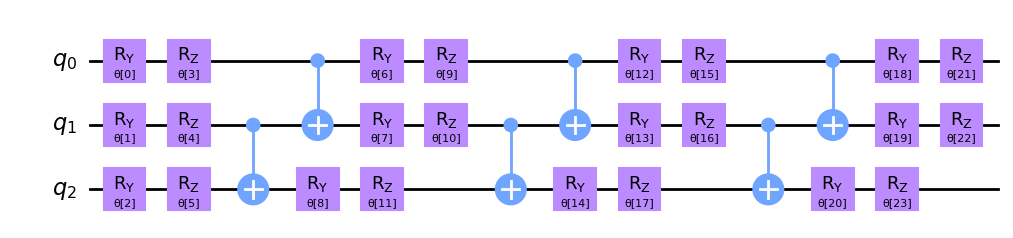

In [ ]:
from qiskit.circuit.library import EfficientSU2
feature_map = ZZFeatureMap(feature_dimension=3, reps=1)
ansatz = EfficientSU2(num_qubits=3, reps=3)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

The hardware efficient SU(2) 2-local circuit.The EfficientSU2 circuit consists of layers of single qubit operations spanned by SU(2) and CX entanglements. This is a heuristic pattern that can be used to prepare trial wave functions.
SU(2) stands for special unitary group of degree 2, its elements are 2× unitary matrices with determinant 1, such as the Pauli rotation gates.

On 3 qubits and using the Pauli Y and Z su2_gates as single qubit gates

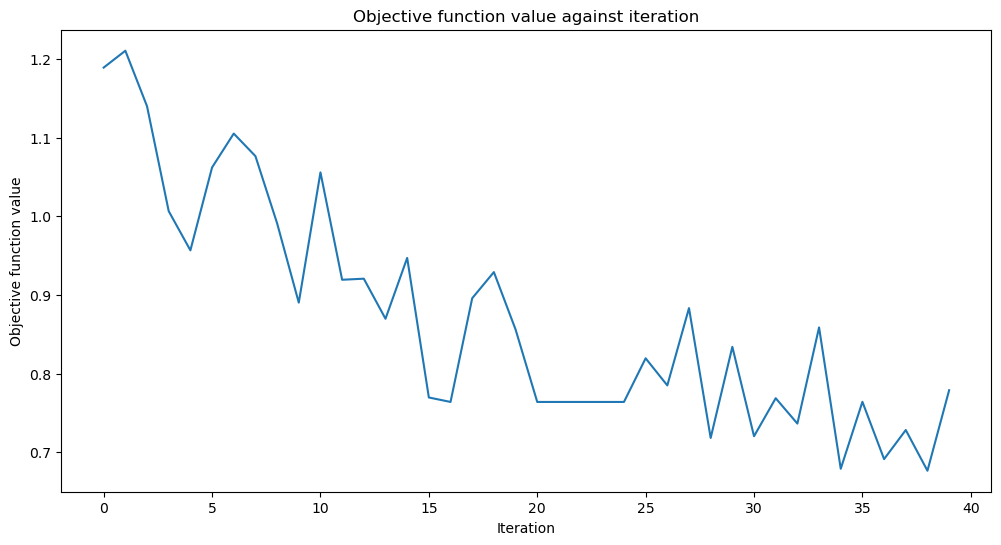

Training time: 31 seconds


In [ ]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.87
Quantum VQC on the test dataset using EfficientSU2:     0.85


In [ ]:
print(f"Model                           | Test Score | Train Score")
print(f"VQC, 3 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")

print(f"VQC, 3 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Test Score | Train Score
VQC, 3 features, RealAmplitudes |       0.87 |       0.85
----------------------------------------------------------
VQC, 3 features, EfficientSU2   |       0.87 |       0.85


In [ ]:
# classification report of VQC
expected_y  = y_test
predicted_y = vqc.predict(X_test)

# print classification report and confusion matrix for the classifier
print("Classification report: \n", metrics.classification_report(expected_y, predicted_y))
print("Confusion matrix: \n", metrics.confusion_matrix(expected_y, predicted_y))
acu=accuracy_score(expected_y, predicted_y)
m_n.append(acu)

acc.append('VQC-ESU2')

Classification report: 
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        54
         1.0       0.00      0.00      0.00         6

    accuracy                           0.90        60
   macro avg       0.45      0.50      0.47        60
weighted avg       0.81      0.90      0.85        60

Confusion matrix: 
 [[54  0]
 [ 6  0]]


C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NAINA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# QPCA

In [ ]:
adhoc_dimension=3
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps = 2, entanglement = "linear")

sampler = Sampler() # This allows you to use different backends (real quantum devices or simulators) as samplers.

fidelity = ComputeUncompute(sampler = sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity = fidelity, feature_map = adhoc_feature_map)

In [ ]:
feature_map = ZZFeatureMap(feature_dimension = 2, reps = 2, entanglement = "linear")
qpca_kernel = FidelityQuantumKernel(fidelity = fidelity, feature_map = feature_map)

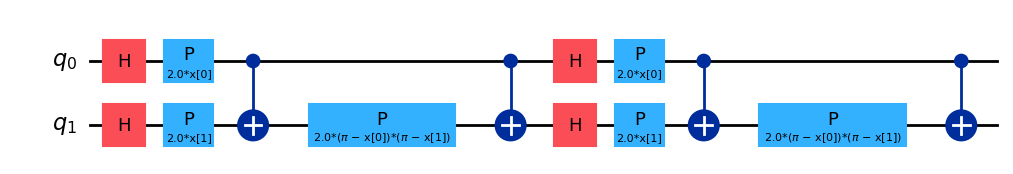

In [ ]:
feature_map.decompose().draw('mpl')

In [ ]:
data=data.iloc[0:200]
X = data[['HighBP','HighChol','Smoker']]
y = data['HeartDiseaseorAttack']

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(
    X, y.to_numpy().reshape(-1,1), train_size=0.8, random_state=algorithm_globals.random_seed
)

In [ ]:
matrix_train = qpca_kernel.evaluate(x_vec = train_features)
matrix_test = qpca_kernel.evaluate(x_vec = test_features, y_vec = train_features)

In [ ]:
from sklearn.decomposition import KernelPCA
#qunatam data classical model
kernel_pca_q = KernelPCA(n_components = 2, kernel = "precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix_train)#quantam data
test_features_q = kernel_pca_q.transform(matrix_test)#quantam data

In [ ]:
print(train_features_q.shape)

(160, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_q, train_labels.ravel())

logistic_score = logistic_regression.score(test_features_q, test_labels)

In [ ]:
print(logistic_score)

m_n.append(logistic_score)

acc.append('QPCA')

0.85


In [ ]:
#classical data classical model
kernel_pca_rbf = KernelPCA(n_components = 2,kernel = "rbf")
kernel_pca_rbf.fit(train_features)
train_features_rbf = kernel_pca_rbf.transform(train_features)
test_features_rbf = kernel_pca_rbf.transform(test_features)

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_features_rbf, train_labels.ravel())

logistic_score = logistic_regression.score(test_features_rbf, test_labels)
print(f"Logistic regression score classical: {logistic_score}")

Logistic regression score classical: 0.85


In [ ]:
df2=pd.DataFrame()
df2['Model Name']=m_n
df2['Accuracy']=acc
print(df2)


   Model Name      Accuracy
0        0.90  Bagging-QSVC
1        0.90          QSVC
2        0.90           VQC
3        0.90      VQC-ESU2
4        0.85          QPCA
5        0.84           QNN
6        0.70    QNN-COBYLA


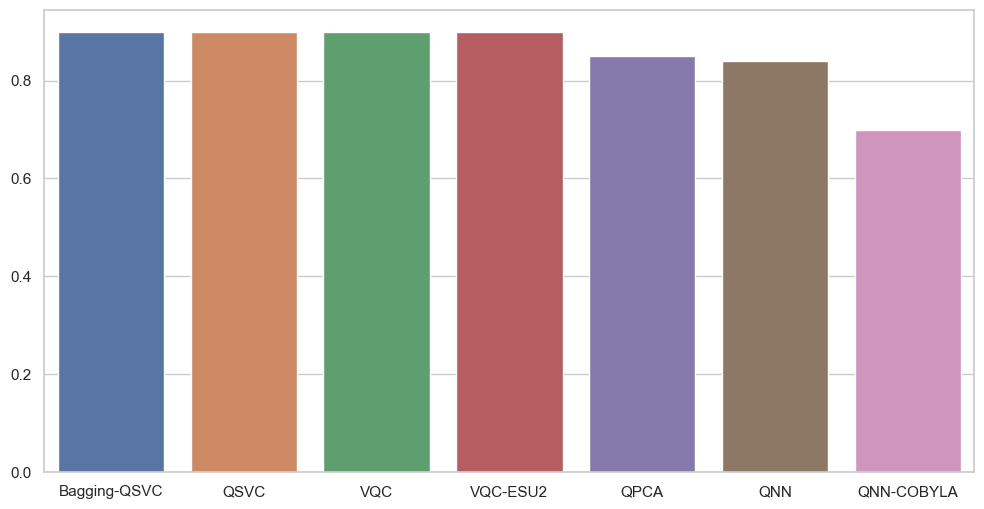

In [ ]:
sns.set(style='whitegrid')
ax=sns.barplot(y=m_n,x=acc,data=df2)

# Inferences

Quantam models like QSVC,Bagging-QSVC outperforms the classical model when an sample of (200,3) is taken from the cleveland data set .As all the classical model had accuracy till 85% except MLP  which has the same accuracy as QSVC.(90 % accuracy)

In [ ]:
m_n=['QNN','QSVC','BAGGING-QSVC','MLP']

In [ ]:
prec=[.84,.90,.90,.90]

In [ ]:
df3=pd.DataFrame()
df3['Model Name']=m_n
df3['Precision']=prec
print(df3)

     Model Name  Precision
0           QNN       0.84
1          QSVC       0.90
2  BAGGING-QSVC       0.90
3           MLP       0.90


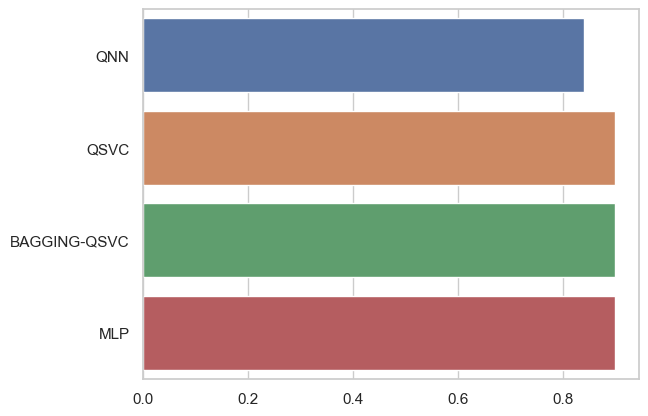

In [ ]:
sns.set(style='whitegrid')
ax=sns.barplot(y=m_n,x=prec,data=df3)